## Training a MultiLayer Perceptron (MLP) on MNIST Dataset

We begin with building a single layer MLP network for image classification task on MNIST dataset. In the first part of the tutorial, we will try to understand the MNIST digit classfication dataset. Then we'll understand how to build a single layer MLP network, define an appropiate loss, and train the network with back-propagation. Finally, we will use the trained model to test on a test dataset.

**Step 1:** We need to import all the required libraries

In [6]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', cuda)

('Using PyTorch version:', '0.3.0.post4', 'CUDA:', True)


**Step 2:** We need to load the MNIST data. In this tutorial, we'll be using Pytorch's dataloader to load and format the MNIST dataset. First time we may have to download the dataset, which may take a while. 

For more details, please refer: 
- https://pytorch.org/docs/0.3.0/data.html?highlight=dataloader#torch.utils.data.DataLoader
- https://pytorch.org/docs/0.3.0/torchvision/datasets.html?highlight=dataset

In [7]:
batch_size = 32 # no. of examples to be processed at once on GPU

# Define the dataloader
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=False)

Processing...
Done!


**Step 3:** Visualize the dataset

- MNIST is a simple computer vision dataset. It consists of 28x28 pixel images of handwritten digits
- The train and test data are provided via data loaders that provide iterators over the datasets. 
- The first element of training data (X_train) is a 4th-order tensor of size (batch_size, 1, 28, 28), i.e. it consists of a batch of images of size 1x28x28 pixels. 
- y_train is a vector containing the correct classes ("0", "1", ..., "9") for each training digit.

For more visualizations and to get more insight on the MNIST dataset you may refer to this link: http://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [8]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

('X_train:', torch.Size([32, 1, 28, 28]), 'type:', 'torch.FloatTensor')
('y_train:', torch.Size([32]), 'type:', 'torch.LongTensor')


Here are the first 10 digits

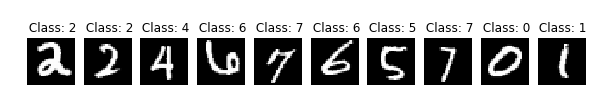

In [19]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray")
    plt.gca().set_title('\n Class: '+str(y_train[i]))
    